# Seaborn - Linear regression

# The tips dataset

One waiter recorded information about each tip he received over a period of a few months working in one restaurant.

He collected the following  variables:


* tip in dollars,
* bill in dollars,
* sex of the bill payer,
* whether there were smokers in the party,
* day of the week,
* time of day,
* size of the party

In all he recorded 244 tips.


In [6]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

import seaborn as sns


In [7]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# 1. Regression 
Can't be simpler

### The sns.regplot function
sns.regplot() accepts the x and y variables in a variety of formats including simple numpy arrays, pandas Series objects, or as references to variables in a pandas DataFrame object passed to data.

    1. New figure fig, ax = plt.subplot()
    2. Plot the regression of the *tip* with regard to the *total bill* with sns.regplot()
    3. Add a title to the plot

![seaborn 01](seaborn_01.png)


# 2. Regression with Categorical values

tips.size is the size of the party

    sns.lmplot(x="size", y="tip", data=tips);

add Jitter with: 

    x_jitter=.05

![seaborn 2](seaborn_02.png)


# 3.1 Plot regression when  y is binary 


Let's create a big tip variable: 

        tips["big_tip"] = (tips.tip / tips.total_bill) > .15
    
and plot the regression of Big Tip vs Total Bill   

![seaborn 3](seaborn_03.png)
    
    
    
**Not really a lot of sense**

# 3.2 Plot regression when  y is binary 


Use Logistic regression instead by setting 

    logistic=True
    

![seaborn 3.1](seaborn_031.png)


# 4. Plot the residuals with residplot

To check the validity of the regression model

A good regression model should have scattered residuals. If there's a discernable pattern, the model is not valid.

### remember the Anscombe Quartet
    
    anscombe = sns.load_dataset("anscombe")

    sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"), scatter_kws={"s": 80});


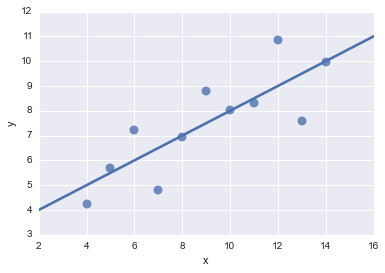

In [40]:
# 1st dataset
anscombe = sns.load_dataset("anscombe")
sns.regplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});


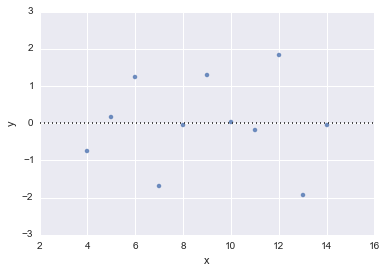

In [42]:
# residuals look good
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"));

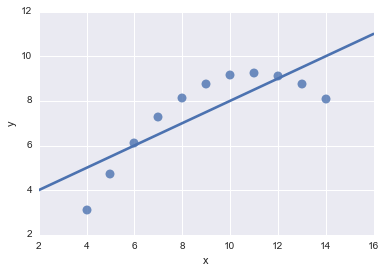

In [43]:
# 2nd dataset
sns.regplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), ci=None, scatter_kws={"s": 80});



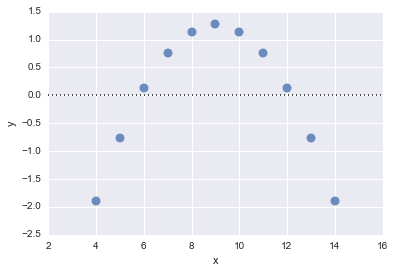

In [45]:
# Residuals not so good, definitely a pattern there
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), scatter_kws={"s": 80});

# 5. With other variables

tip vs total bill
* use lmplot instead of regplot

and set
* hue = "smoker"
* col = "time"
* row = "sex"

    sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", row="sex", data=tips);

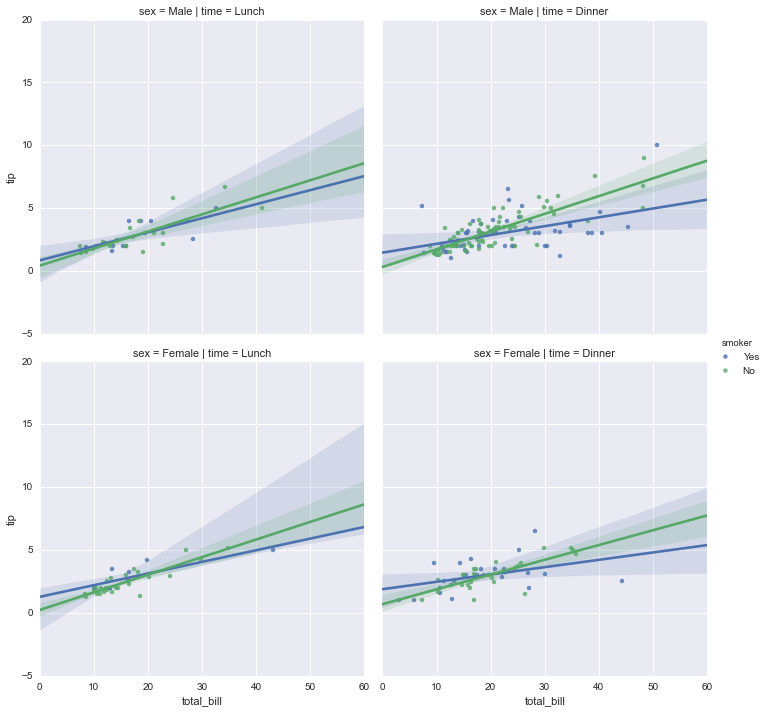

In [47]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", row="sex", data=tips);

# 6. Other regression functions

Experiment with

* sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");
* sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"], size=5, aspect=.8, kind="reg");
* add hue="smoker" to the pairplot


# 7. Boxplot

create a figure with 2 subplots (horizontal)

use 

    sns.boxplot(x="day", y="total_bill", hue = ...., data=tips[some condition], ax = ....);

to plot 

![seaborn](seaborn_07.png)